(polytomous-notebook)=
# Modelli per Risposte Politomiche 

### Introduzione 

Le opinioni delle persone vengono frequentemente esplorate mediante scale di risposta che variano da "completamente in disaccordo" a "completamente d'accordo". Questi tipi di dati, noti come dati ordinali, sono molto diffusi in psicologia. Nonostante sia ampiamente riconosciuto che i dati ordinali non siano veri dati metrici, è comune nella ricerca psicologica analizzarli con metodi progettati per dati metrici, che può portare a conclusioni errate (Liddell & Kruschke, 2018).

Le principali problematiche legate all'uso di tali metodi con dati ordinali includono:

1. **Distanza non uniforme tra le categorie**: Le categorie di risposta in una scala ordinale potrebbero non avere intervalli equidistanti, una condizione spesso presupposta nei modelli statistici per dati metrici. La percezione della differenza tra "completamente in disaccordo" e "moderatamente in disaccordo" potrebbe essere meno marcata rispetto a quella tra "moderatamente in disaccordo" e "moderatamente d'accordo".

2. **Distribuzione non normale delle risposte**: Le risposte ordinali possono distribuirsi in modo non normale, specialmente se le estremità della scala sono selezionate frequentemente dai partecipanti.

3. **Varianze eterogenee delle variabili latenti**: Le varianze delle variabili latenti, che sono alla base delle osservazioni ordinali, possono variare significativamente tra gruppi, condizioni o periodi di tempo. Queste varianze eterogenee non sono facilmente gestibili né identificabili mediante l'approccio metrico tradizionale.

Per affrontare queste sfide, sono stati sviluppati numerosi modelli parametrici per dati ordinali, tra cui il Graded Response Model (GRM).

In [110]:
suppressPackageStartupMessages({
    library("tidyverse")
    library("mirt")
    # devtools::install_github("masurp/ggmirt")
    library("ggmirt")
    library("psychotools")
    library("WrightMap")
    library("latex2exp")
    library("lavaan")
    })

#### Modelli Cumulativi e il Graded Response Model

Consideriamo una scala Likert a quattro punti, che va da "completamente in disaccordo" a "completamente d'accordo". Questa è una scala ordinale perché le categorie sono ordinate, ma non è chiaro quanto sia grande la distanza psicologica tra esse né se queste distanze siano consistenti tra i partecipanti.

Il modello cumulativo, come il GRM, assume che la variabile ordinale osservata $Y$, in questo caso l'opinione sull'argomento oggetto dell'item, derivi dalla categorizzazione di una variabile continua latente $Z$. Nel nostro esempio, $Z$ rappresenta l'opinione latente. Se definiamo $K$ soglie $\tau$, che dividono $Z$ in $K+1$ categorie ordinate di $Y$, possiamo esprimere la probabilità che $Y$ sia uguale alla categoria $k$ come:

$$ P(Y = k) = F(\tau_k) - F(\tau_{k-1}) $$

dove $F$ è la funzione di distribuzione cumulativa della distribuzione di $Z$.

Il GRM, specificamente, è utilizzato per analizzare risposte a item con più di due categorie risposta, comuni nelle scale Likert. In questo modello, le soglie multiple sono stimate per ogni item, rappresentando il punto lungo un tratto continuo dove la probabilità di superare una determinata soglia è del 50%. La probabilità che un individuo risponda in una determinata categoria $k$ o superiore, data la sua abilità $\theta$, è modellata con una funzione sigmoidea:

$$
P(Y \geq k|\theta) = \frac{1}{1 + e^{-(a(\theta - b_k))}},
$$

dove $a$ rappresenta il parametro di discriminazione dell'item e $b_k$ è il parametro di difficoltà associato al passaggio dalla categoria $k-1$ a $k$.

Il GRM fornisce un metodo per analizzare e interpretare le differenze nelle opinioni e nei tratti misurati in contesti psicologici, facilitando una comprensione più dettagliata e precisa delle dinamiche delle risposte ordinali.

## Una Applicazione Concreta

Utilizzeremo i dati di un recente articolo che indaga l'"effetto dell'elevazione iniziale" (Anvari et al., 2022), e ci concentreremo sui 10 item negativi dalla PANAS. I dati sono disponibili sul sito web OSF.

In [20]:
df.all <- read_csv("https://osf.io/download/6fbr5/")
# if you have issues with the link, please try downloading manually using the same URL as above
# and read the file from your local drive.

# subset items and demographic variables
df <- df.all %>%
    select(
        starts_with("PANASD2_1"),
        starts_with("PANASD2_20"),
        age, Sex, Group
    ) %>%
    select(!PANASD2_10_Active) %>%
    select(!PANASD2_1_Attentive)

Rows: 1856 Columns: 74
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): id, RecordedDate.Recruitment, Group, RecordedDate.D2, Anchor.Posit...
dbl (62): Finished.D2, AnxietyD2_OnEdge, AnxietyD2_Uneasy, AnxietyD2_Anxious...
lgl  (2): Finished.Recruitment, Finished.D1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [30]:
# Rinomina le colonne del data frame
df <- df %>%
    rename(
        Distressed = PANASD2_11_Distressed,
        Upset = PANASD2_12_Upset,
        Hostile = PANASD2_13_Hostile,
        Irritable = PANASD2_14_Irritable,
        Scared = PANASD2_15_Scared,
        Afraid = PANASD2_16_Afraid,
        Ashamed = PANASD2_17_Ashamed,
        Guilty = PANASD2_18_Guilty,
        Nervous = PANASD2_19_Nervous,
        Jittery = PANASD2_20_Jittery
    )

In [31]:
glimpse(df)

Rows: 1,851
Columns: 13
$ Distressed <dbl> 2, 2, 2, 1, 2, 2, 4, 1, 1, 3, 1, 4, 2, 4, 4, 1, 2, 2, 1, 2,…
$ Upset      <dbl> 1, 1, 4, 1, 1, 5, 2, 1, 2, 2, 2, 3, 1, 3, 5, 1, 1, 2, 1, 1,…
$ Hostile    <dbl> 1, 1, 2, 1, 1, 3, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,…
$ Irritable  <dbl> 1, 1, 3, 1, 2, 5, 3, 1, 2, 4, 2, 3, 1, 2, 3, 1, 4, 1, 1, 2,…
$ Scared     <dbl> 1, 1, 3, 1, 1, 4, 1, 1, 1, 2, 2, 2, 1, 4, 4, 1, 1, 1, 1, 2,…
$ Afraid     <dbl> 1, 1, 4, 1, 1, 3, 1, 1, 1, 3, 1, 2, 1, 4, 4, 1, 1, 1, 1, 2,…
$ Ashamed    <dbl> 1, 1, 2, 1, 1, 3, 1, 1, 1, 2, 1, 4, 1, 1, 3, 1, 3, 1, 1, 1,…
$ Guilty     <dbl> 2, 1, 2, 1, 1, 3, 3, 1, 1, 3, 1, 4, 1, 1, 3, 1, 2, 1, 1, 1,…
$ Nervous    <dbl> 1, 1, 2, 1, 2, 4, 4, 1, 1, 4, 2, 4, 2, 1, 5, 1, 2, 1, 1, 2,…
$ Jittery    <dbl> 1, 2, 3, 1, 1, 2, 3, 3, 2, 1, 2, 2, 1, 1, 4, 1, 2, 2, 1, 3,…
$ age        <dbl> 27, 32, 21, 27, 20, 22, 23, 25, 21, 26, 38, 36, 24, 21, 19,…
$ Sex        <chr> "Male", "Male", "Female", "Male", "Male", "Male", "Female",…
$ Group      <ch

Dato che ci sono solo 5 partecipanti che utilizzano etichette diverse da Femminile/Maschile (troppo pochi per un'analisi statistica robusta), li rimuoveremo per avere un dataset completo per tutte le variabili in questo esempio.

In [22]:
df <- df %>%
    filter(Sex %in% c("Female", "Male"))

In [38]:
df_num <- df[, 1:10]

In [39]:
glimpse(df_num)

Rows: 1,851
Columns: 10
$ Distressed <dbl> 2, 2, 2, 1, 2, 2, 4, 1, 1, 3, 1, 4, 2, 4, 4, 1, 2, 2, 1, 2,…
$ Upset      <dbl> 1, 1, 4, 1, 1, 5, 2, 1, 2, 2, 2, 3, 1, 3, 5, 1, 1, 2, 1, 1,…
$ Hostile    <dbl> 1, 1, 2, 1, 1, 3, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,…
$ Irritable  <dbl> 1, 1, 3, 1, 2, 5, 3, 1, 2, 4, 2, 3, 1, 2, 3, 1, 4, 1, 1, 2,…
$ Scared     <dbl> 1, 1, 3, 1, 1, 4, 1, 1, 1, 2, 2, 2, 1, 4, 4, 1, 1, 1, 1, 2,…
$ Afraid     <dbl> 1, 1, 4, 1, 1, 3, 1, 1, 1, 3, 1, 2, 1, 4, 4, 1, 1, 1, 1, 2,…
$ Ashamed    <dbl> 1, 1, 2, 1, 1, 3, 1, 1, 1, 2, 1, 4, 1, 1, 3, 1, 3, 1, 1, 1,…
$ Guilty     <dbl> 2, 1, 2, 1, 1, 3, 3, 1, 1, 3, 1, 4, 1, 1, 3, 1, 2, 1, 1, 1,…
$ Nervous    <dbl> 1, 1, 2, 1, 2, 4, 4, 1, 1, 4, 2, 4, 2, 1, 5, 1, 2, 1, 1, 2,…
$ Jittery    <dbl> 1, 2, 3, 1, 1, 2, 3, 3, 2, 1, 2, 2, 1, 1, 4, 1, 2, 2, 1, 3,…


Esaminiamo la distribuzione delle risposte in ciascuna categoria, per ciascun item.

In [41]:
# Preparare una lista per memorizzare le tabelle delle frequenze relative
frequencies_list <- list()

# Calcolare le frequenze relative per ciascuna emozione
for (i in names(df_num)) {
    # Calcolo della tabella di frequenza
    freq_table <- table(df_num[[i]])

    # Conversione in frequenze relative
    relative_freq_table <- prop.table(freq_table) * 100

    # Aggiungere la tabella alla lista con un nome appropriato
    frequencies_list[[i]] <- relative_freq_table
}

# Stampare le tabelle delle frequenze relative per ciascuna emozione
frequencies_list

$Distressed

        1         2         3         4         5 
36.574824 27.336575 18.962723 13.614263  3.511615 

$Upset

        1         2         3         4         5 
50.945435 22.474338 14.262561  8.860076  3.457590 

$Hostile

        1         2         3         4         5 
61.750405 19.989195 11.777418  5.186386  1.296596 

$Irritable

        1         2         3         4         5 
40.572663 25.769854 17.287952 11.993517  4.376013 

$Scared

        1         2         3         4         5 
57.536467 19.989195 12.047542  8.049703  2.377093 

$Afraid

        1         2         3         4         5 
53.916802 19.935170 13.452188  9.562399  3.133441 

$Ashamed

        1         2         3         4         5 
66.018368 17.990276  9.346299  4.592112  2.052944 

$Guilty

        1         2         3         4         5 
64.235548 17.450027 10.210697  5.942734  2.160994 

$Nervous

        1         2         3         4         5 
35.008104 26.039978 17.666126 16.42

Adattiamo ai dati il modello uni-fattoriale, per variabili ordinali.

In [54]:
mod_cfa <- "F =~ Distressed + Upset+ Hostile + Irritable + Scared + 
                 Afraid + Ashamed + Guilty + Nervous + Jittery"

my_cfa <- cfa(
    mod_cfa, 
    data = df_num, 
    std.lv = TRUE, 
    ordered=c('Distressed', 'Upset', 'Hostile', 'Irritable', 'Scared', 
    'Afraid', 'Ashamed', 'Guilty', 'Nervous', 'Jittery')
)

Le misure di bontà di adattamento sono buone.

In [55]:
fitMeasures(my_cfa, c(
    "chisq", "df", "pvalue",
    "rmsea", "srmr", "gfi", "cfi", "tli"
)) %>%
    as.data.frame() %>%
    t() %>%
    as.data.frame() %>%
    round(3) 

,chisq,df,pvalue,rmsea,srmr,gfi,cfi,tli
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
.,609.2,35,0,0.094,0.059,0.992,0.988,0.985


Esaminiamo le saturazioni fattoriali.

In [62]:
out <- parameterEstimates(my_cfa)
out[out$op == "=~", ] 

,lhs,op,rhs,est,se,z,pvalue,ci.lower,ci.upper
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,F,=~,Distressed,0.6625537,0.015920202,41.61717,0,0.6313506,0.6937567
2,F,=~,Upset,0.8029147,0.010980723,73.12038,0,0.7813928,0.8244365
3,F,=~,Hostile,0.6461593,0.017707487,36.49074,0,0.6114533,0.6808654
4,F,=~,Irritable,0.7319141,0.012891703,56.77404,0,0.7066468,0.7571814
5,F,=~,Scared,0.8808961,0.008358931,105.38383,0,0.8645129,0.8972794
6,F,=~,Afraid,0.8792873,0.007816413,112.49243,0,0.8639674,0.8946072
7,F,=~,Ashamed,0.7811557,0.013513552,57.80536,0,0.7546697,0.8076418
8,F,=~,Guilty,0.7393991,0.014947237,49.46728,0,0.7101031,0.7686952
9,F,=~,Nervous,0.7953141,0.010096867,78.76841,0,0.7755247,0.8151036


Adattiamo ai dati il Graded Response Model:

In [113]:
mirt_grm <- mirt(df_num, 1, itemtype = "graded", verbose = FALSE)

Esaminiamo la soluzione fattoriale.

In [64]:
summary(mirt_grm)

              F1    h2
Distressed 0.698 0.488
Upset      0.816 0.666
Hostile    0.656 0.430
Irritable  0.722 0.521
Scared     0.880 0.774
Afraid     0.878 0.771
Ashamed    0.773 0.598
Guilty     0.727 0.528
Nervous    0.821 0.674
Jittery    0.662 0.438

SS loadings:  5.888 
Proportion Var:  0.589 

Factor correlations: 

   F1
F1  1


## Confronto con i risultati della CFA

Ci possiamo chiedere in che misura i risultati IRT differiscano da quelli ottenuti con una CFA. Possiamo semplicemente estrarre i punteggi fattoriali da entrambi i modelli e calcolre la correlazione.

In [101]:
cor.test(predict(my_cfa), fscores(mirt_grm))


	Pearson's product-moment correlation

data:  predict(my_cfa) and fscores(mirt_grm)
t = 601.09, df = 1849, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9972080 0.9976729
sample estimates:
     cor 
0.997451 


Come si può vedere, sono quasi equivalenti. Un bel esempio di come due approcci diversi portino a una stima quasi identica del tratto latente.

## Parametri IRT

Esaminiamo i parametri del modello IRT. Il GRM stima un parametro di discriminazione per item, che indica quanto bene l'item distingue tra individui con differenti livelli del tratto latente, e diversi parametri di difficoltà (soglie) per ciascun passaggio tra le categorie di risposta.

In [104]:
coef(mirt_grm, IRT = TRUE, simplify = TRUE)$items %>%
    round(2) %>%
    as.data.frame()

,a,b1,b2,b3,b4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Distressed,1.66,-0.46,0.55,1.37,2.62
Upset,2.41,0.05,0.79,1.44,2.24
Hostile,1.48,0.47,1.39,2.36,3.60
Irritable,1.78,-0.32,0.60,1.37,2.40
Scared,3.15,0.24,0.87,1.42,2.23
Afraid,3.12,0.13,0.76,1.31,2.10
Ashamed,2.08,0.54,1.29,1.94,2.68
Guilty,1.80,0.50,1.23,1.92,2.83
Nervous,2.45,-0.46,0.37,1.00,2.03


## Curve di risposta alle categorie

Spesso è di interesse esaminare le probabilità di risposta a categorie specifiche sulla scala di valutazione di un item. Queste probabilità trovano una chiara rappresentazione grafica nelle curve di risposta alle categorie (CRC) illustrate di seguito.

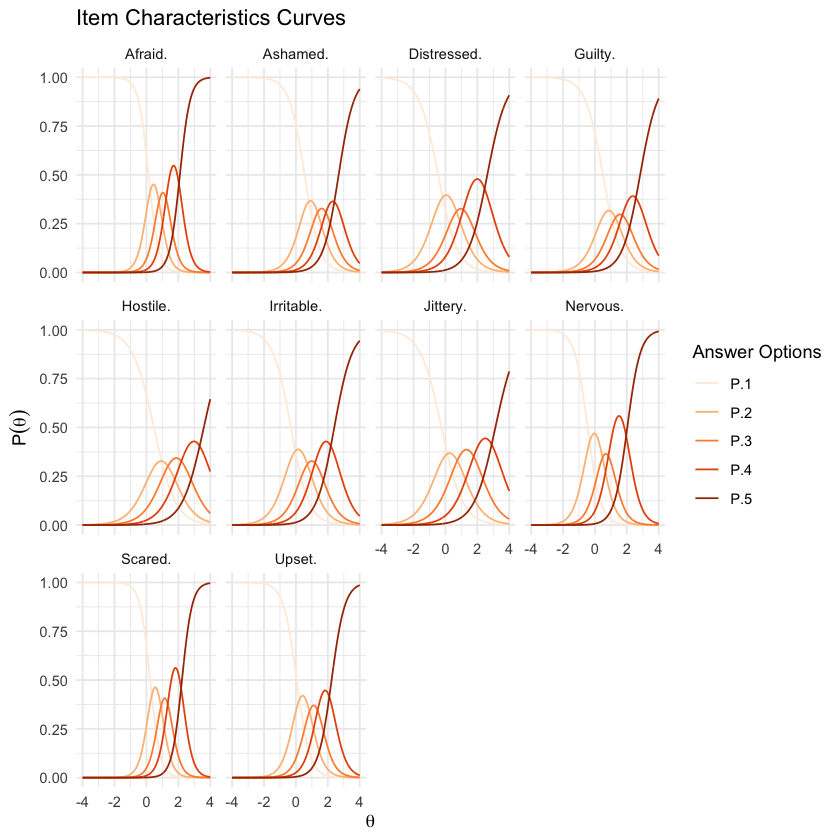

In [96]:
tracePlot(mirt_grm) +
    labs(color = "Answer Options")

Queste curve hanno una chiara relazione con theta: Man mano che theta aumenta, la probabilità di approvare una categoria aumenta e poi diminuisce mentre le risposte passano alla categoria successiva più alta. Di nuovo, vediamo chiaramente che tutte le opzioni di risposta dell'item coprono un'ampia gamma del tratto latente.

Possiamo anche usare una sintassi alternativa.

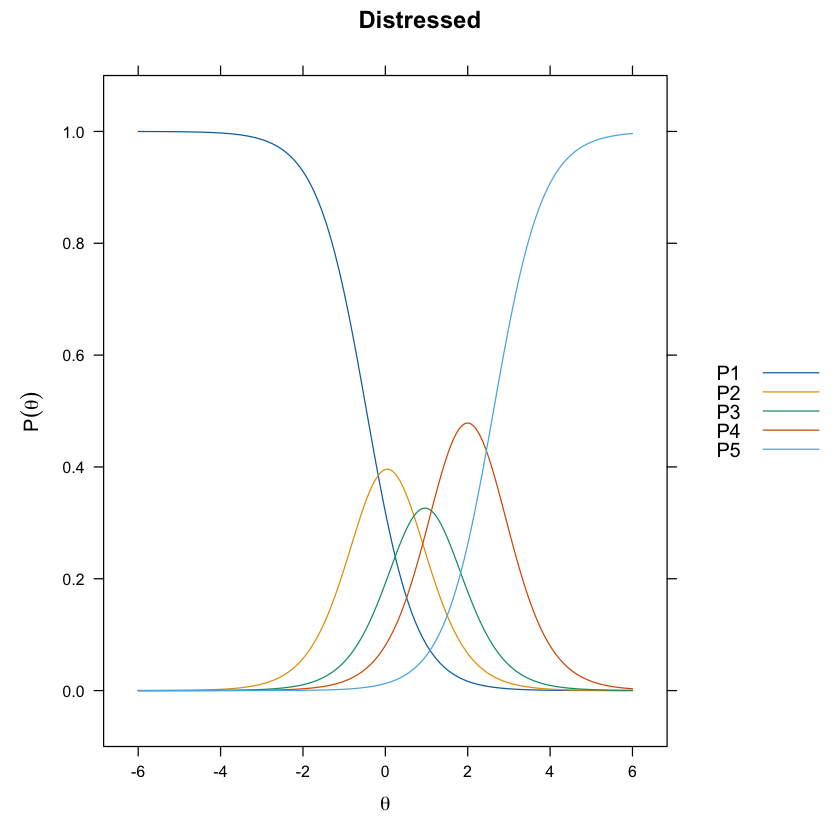

In [72]:
update(itemplot(mirt_grm, 1, type = "trace"), main = colnames(df_num)[1])

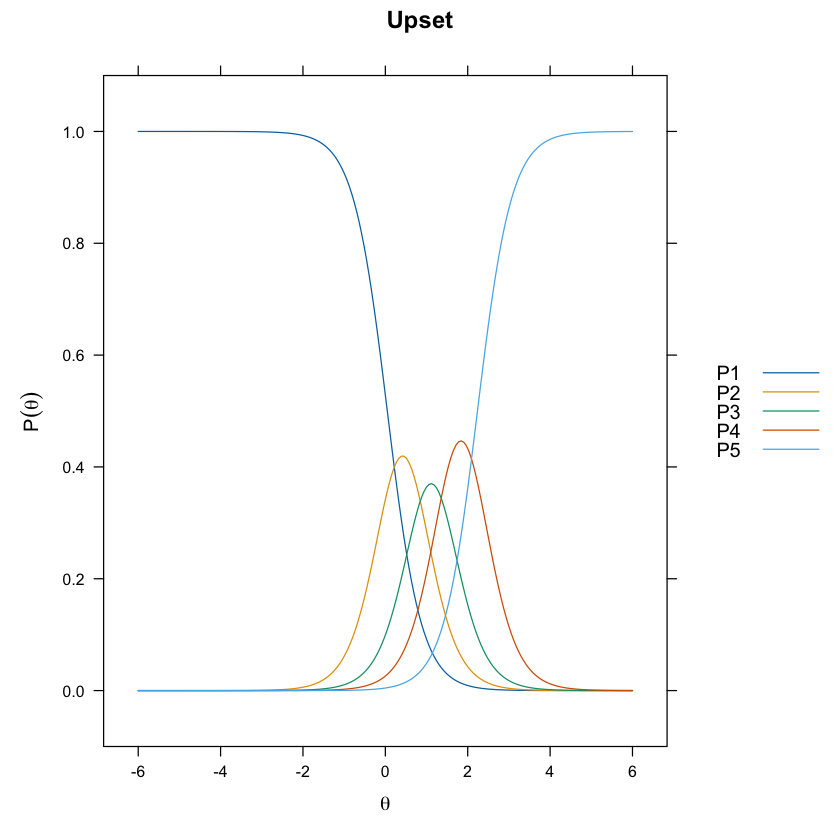

In [73]:
update(itemplot(mirt_grm, 2, type = "trace"), main = colnames(df_num)[2])

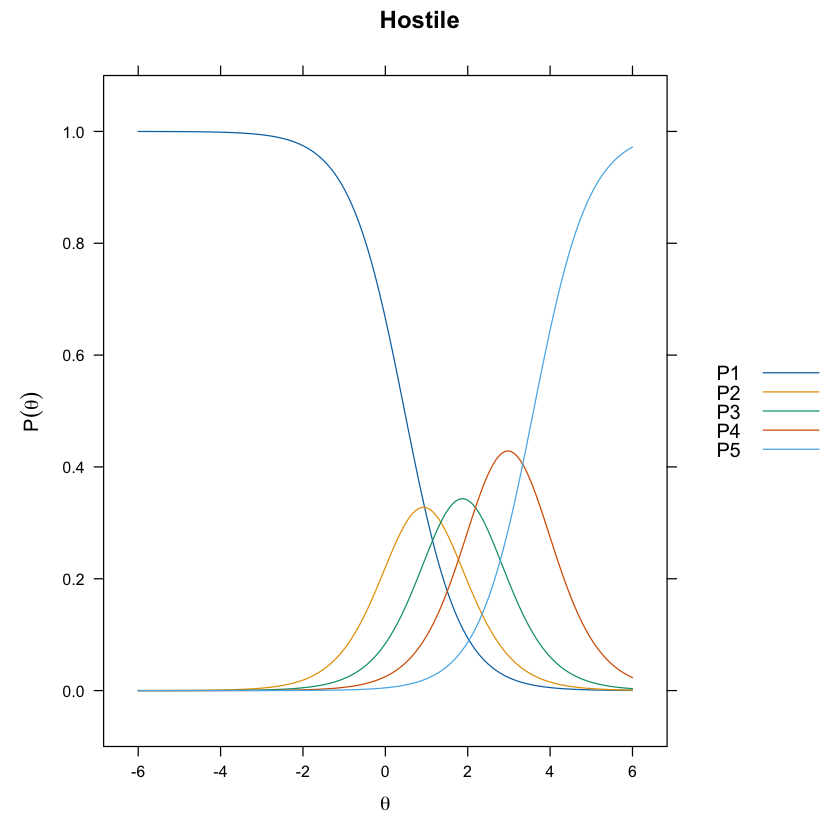

In [74]:
update(itemplot(mirt_grm, 3, type = "trace"), main = colnames(df_num)[3])

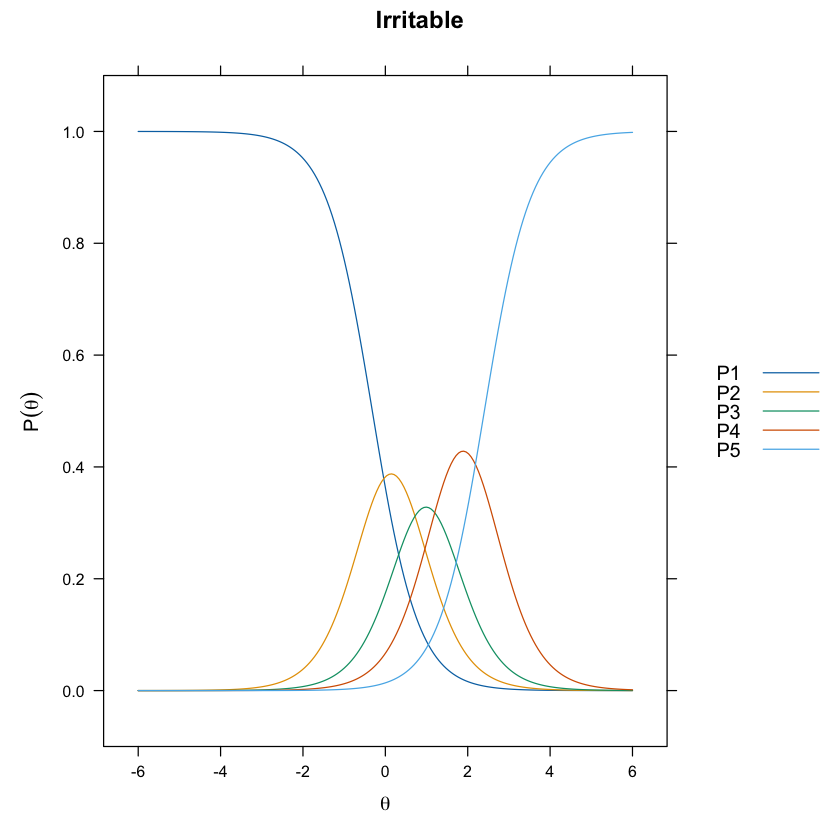

In [75]:
update(itemplot(mirt_grm, 4, type = "trace"), main = colnames(df_num)[4])

La stessa informazione dei grafici precedenti può essere fornita esaminando la funzioni cumulative.

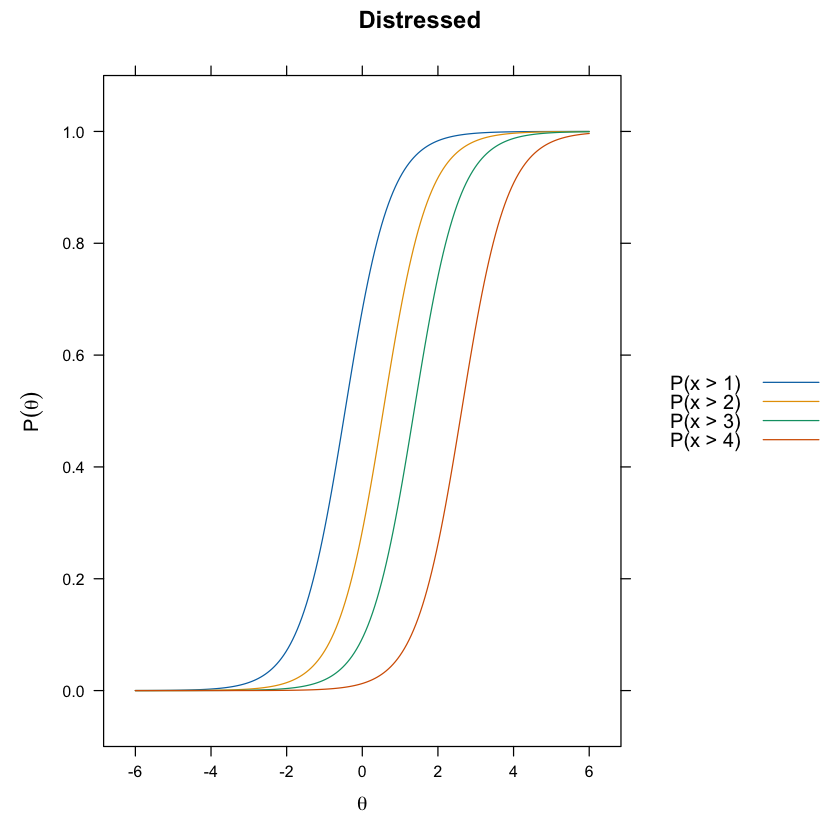

In [77]:
update(itemplot(mirt_grm, 1, type = "threshold"), main = colnames(df_num)[1])

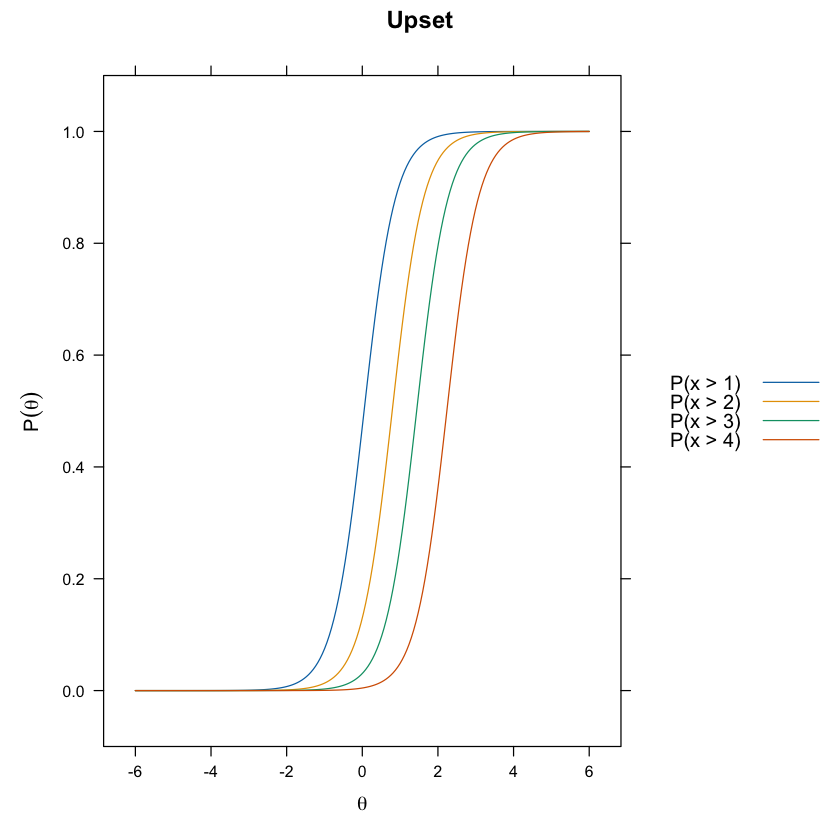

In [78]:
update(itemplot(mirt_grm, 2, type = "threshold"), main = colnames(df_num)[2])

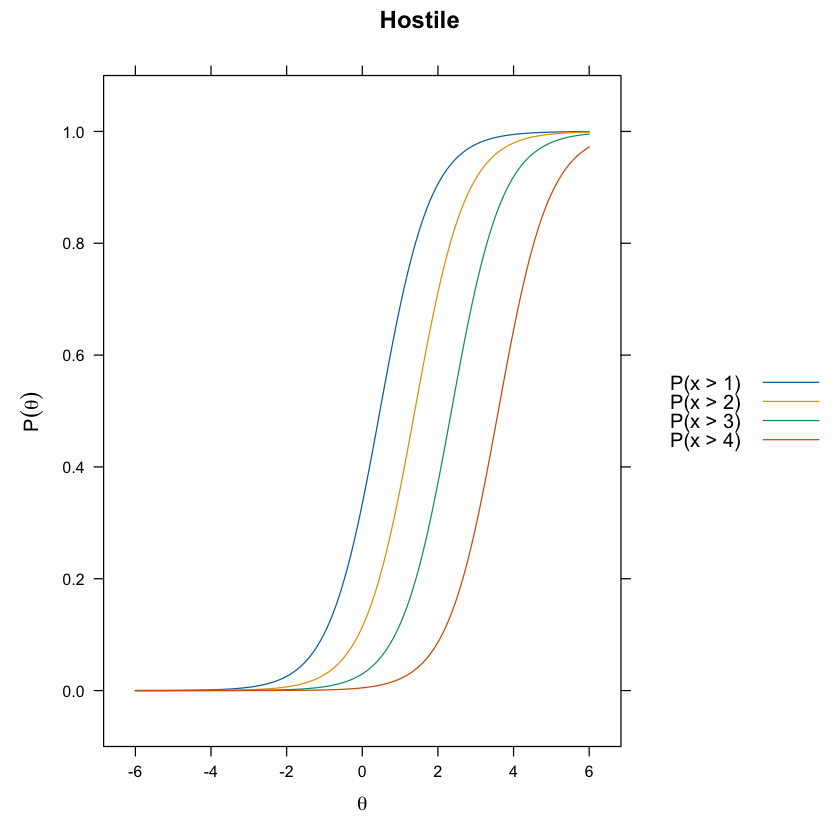

In [79]:
update(itemplot(mirt_grm, 3, type = "threshold"), main = colnames(df_num)[3])

## Curve di Informazione degli Item

Il concetto di "informazione" in statistica si riferisce alla capacità di un item di stimare con precisione i punteggi su un tratto latente, indicato con theta. L'informazione a livello di item specifica quanto efficacemente ogni item contribuisca alla precisione della stima dei punteggi; maggiore è il livello di informazione fornito da un item, più accurata sarà la stima del punteggio.

Attraverso l'analisi dei grafici delle curve di informazione degli item, è possibile osservare che non tutti gli item forniscono lo stesso livello di informazione. Le curve evidenziano in particolare che gli item 2, 5, 6 e 9 sono particolarmente efficaci nella misurazione del tratto latente, come si può dedurre anche dai loro elevati carichi fattoriali. Questo strumento permette quindi di identificare quali item sono più utili per ottenere stime precise delle caratteristiche misurate.

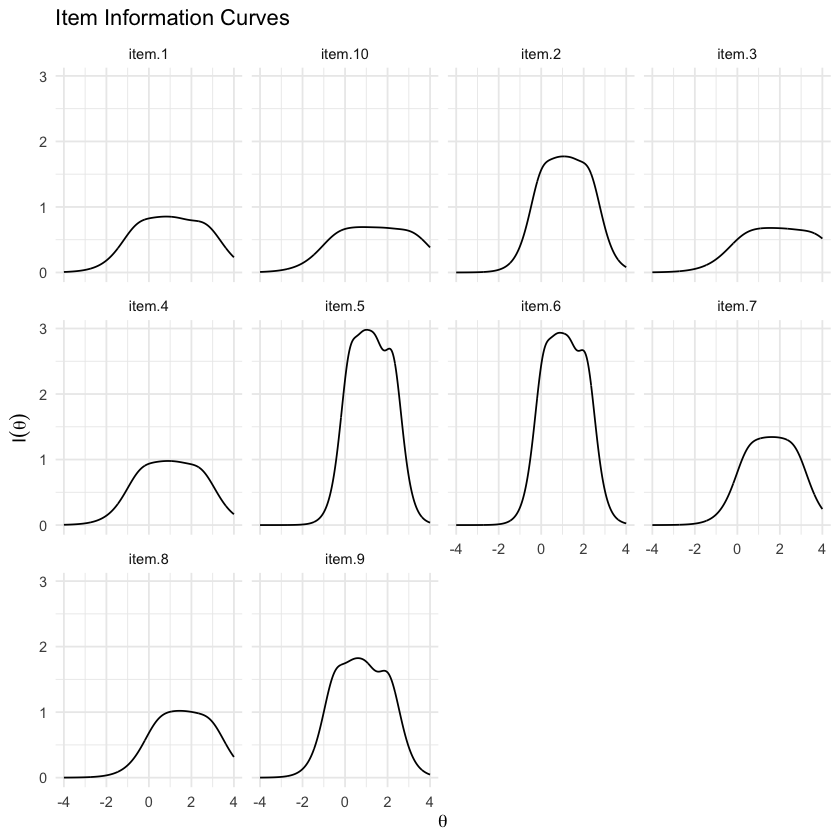

In [99]:
itemInfoPlot(mirt_grm, facet = TRUE)

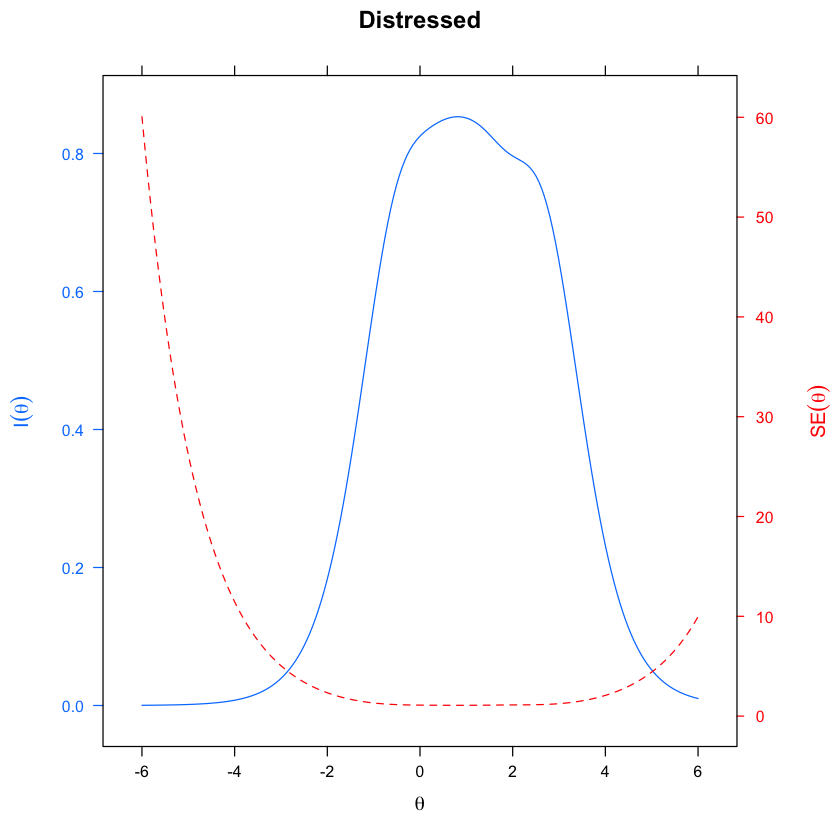

In [80]:
update(itemplot(mirt_grm, 1, type = "infoSE"), main = colnames(df_num)[1])

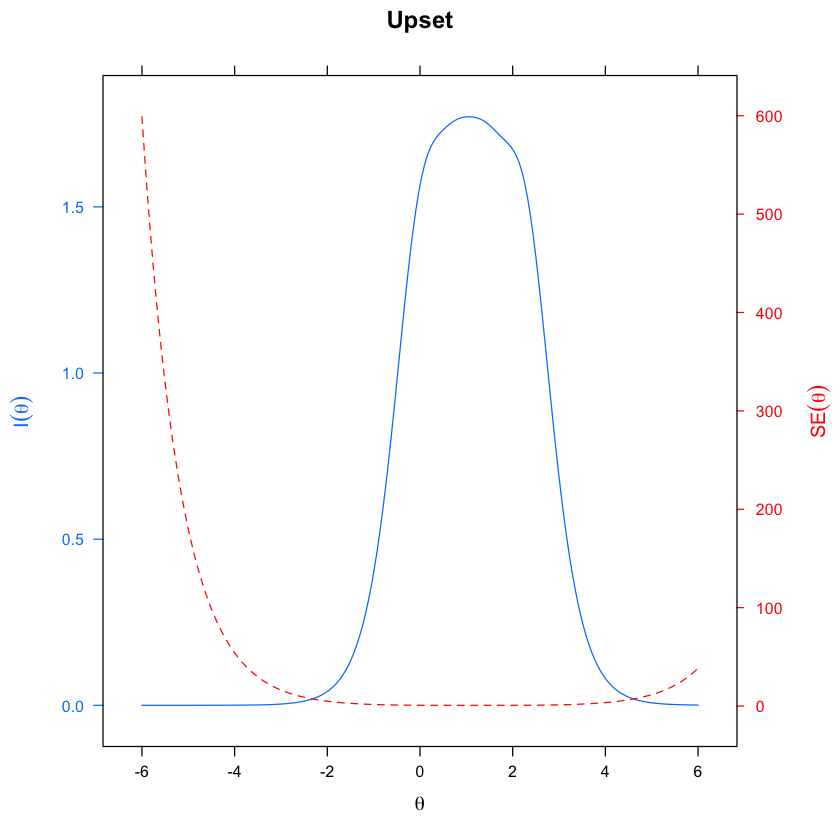

In [81]:
update(itemplot(mirt_grm, 2, type = "infoSE"), main = colnames(df_num)[2])

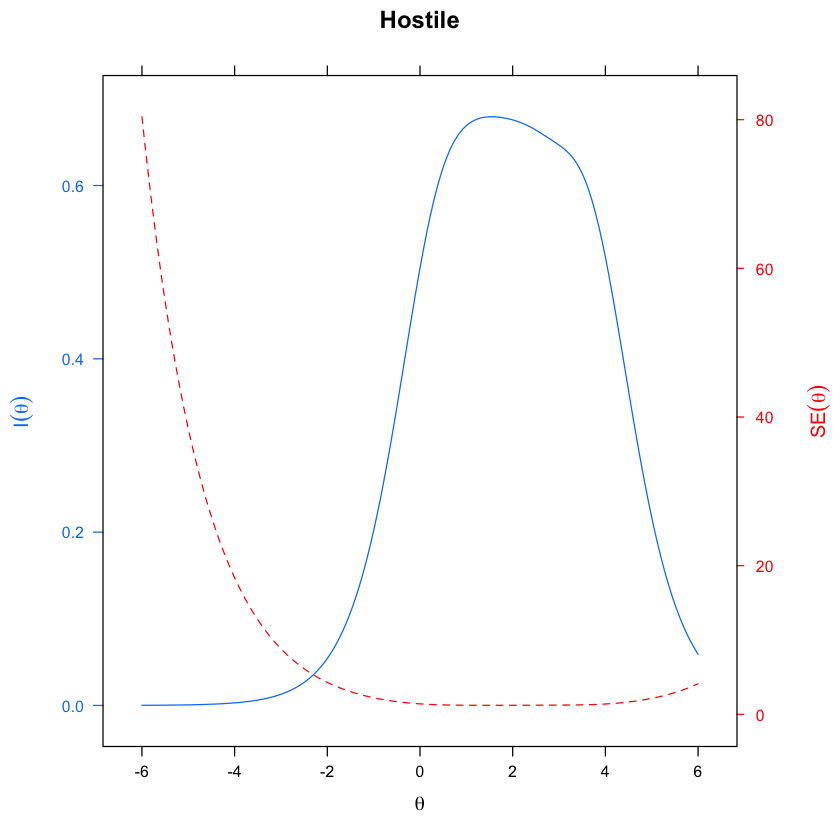

In [82]:
update(itemplot(mirt_grm, 3, type = "infoSE"), main = colnames(df_num)[3])

## ORF e IIF in un singolo plot

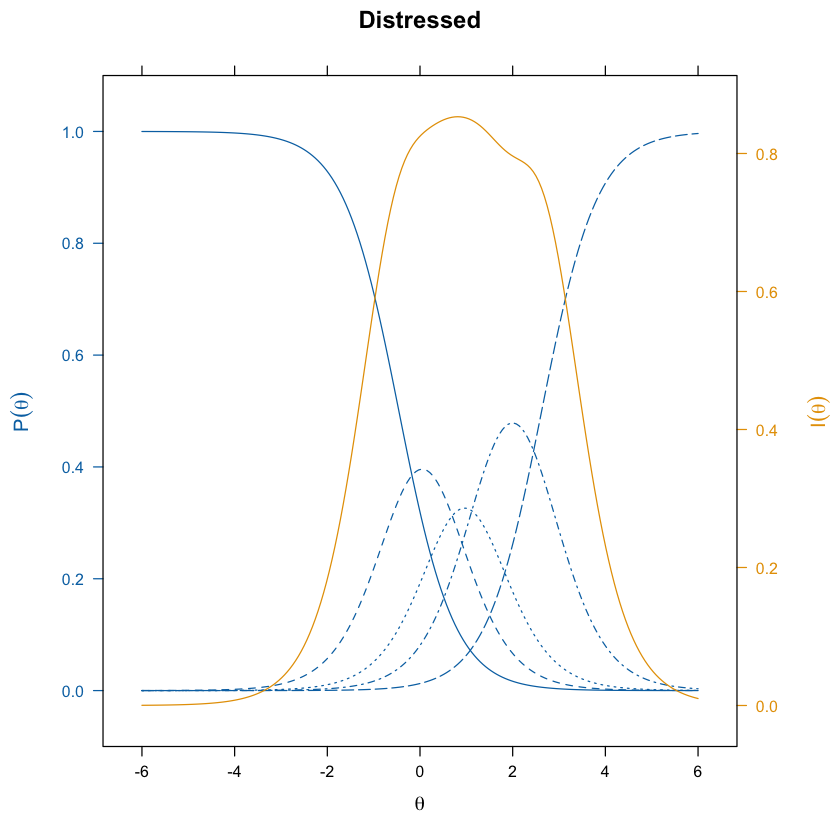

In [83]:
update(itemplot(mirt_grm, 1, type = "infotrace"), main = colnames(df_num)[1])

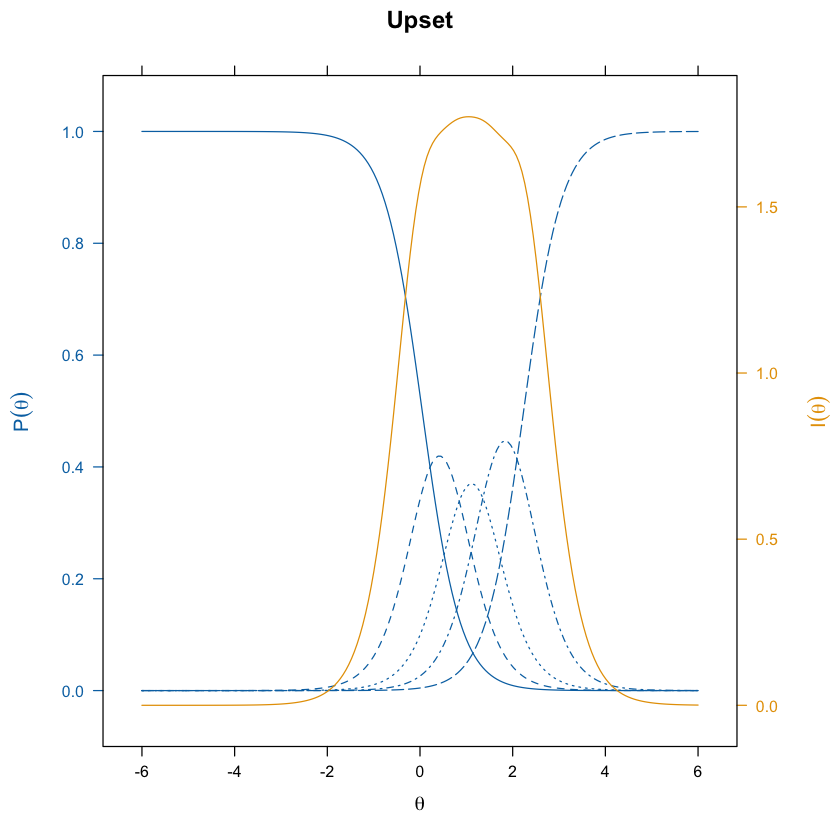

In [84]:
update(itemplot(mirt_grm, 2, type = "infotrace"), main = colnames(df_num)[2])

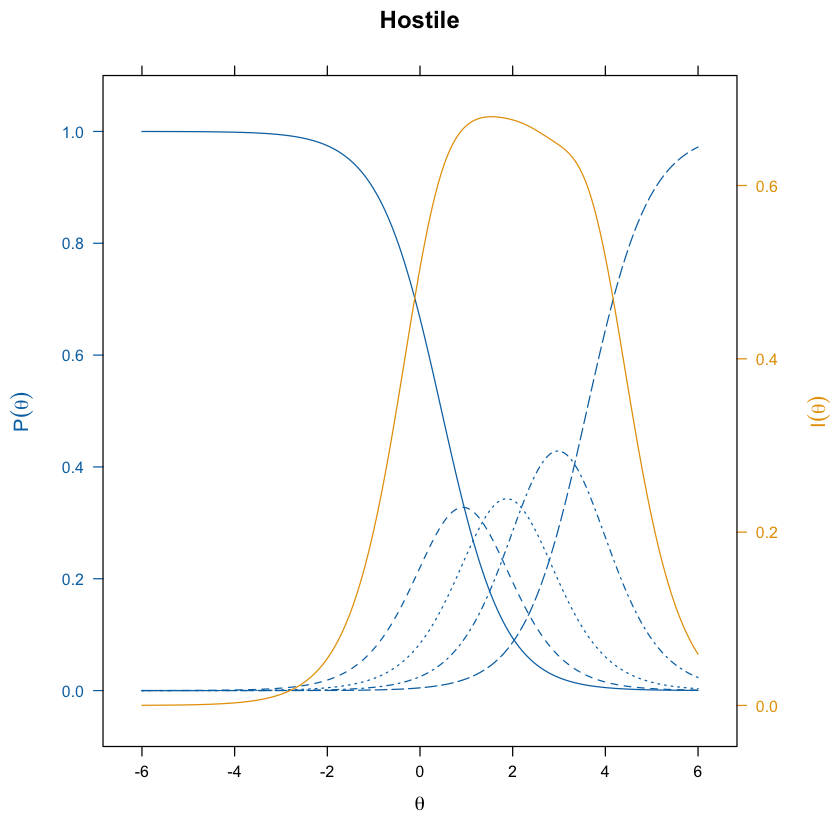

In [85]:
update(itemplot(mirt_grm, 3, type = "infotrace"), main = colnames(df_num)[3])

## Test Information Curve

Una capacità particolarmente utile della teoria della risposta al test (IRT) è che le informazioni per singoli item possono essere sommate per formare una funzione di informazione della scala. Una funzione di informazione della scala è un riassunto di quanto bene gli item, nel loro complesso, forniscono informazioni statistiche sul tratto latente. Inoltre, i valori dell'informazione della scala possono essere utilizzati per calcolare gli errori standard condizionali che indicano con quanta precisione i punteggi possono essere stimati attraverso diversi valori di theta.

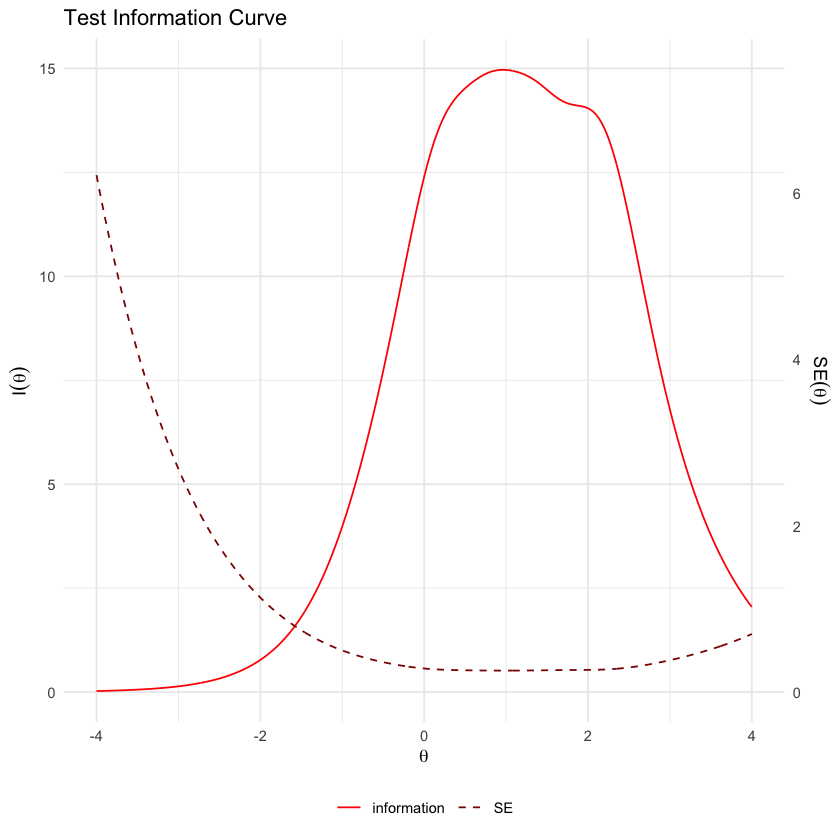

In [100]:
testInfoPlot(mirt_grm, adj_factor = .5)

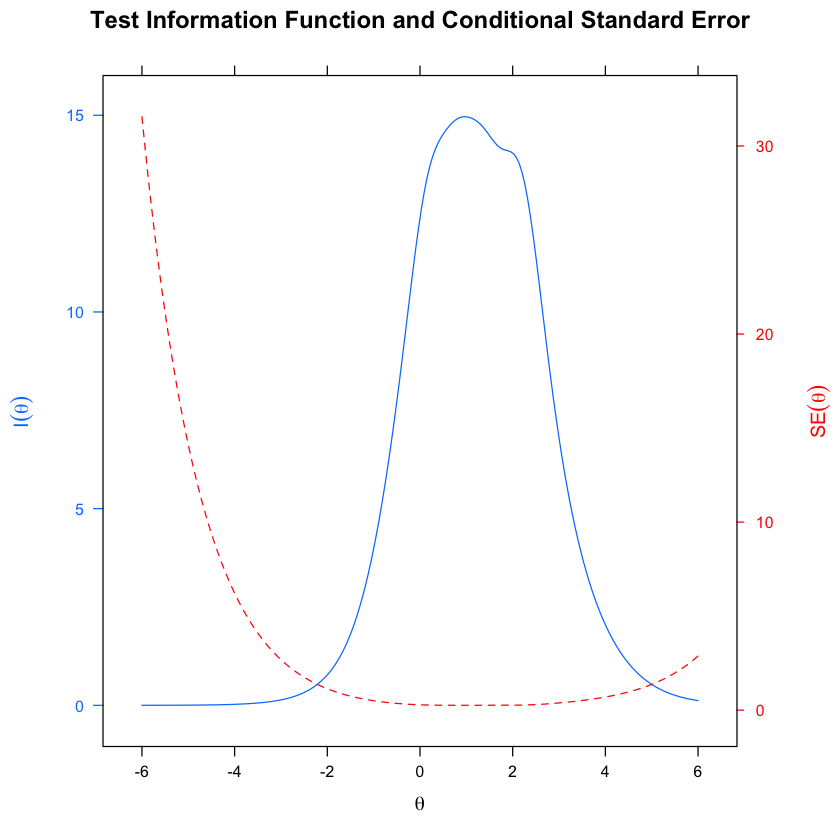

In [86]:
plot(mirt_grm,
    type = "infoSE", theta_lim = c(-6, 6),
    main = "Test Information Function and Conditional Standard Error"
)

La relazione tra le informazioni sulla scala e gli errori standard condizionati è illustrata sopra. La linea blu continua rappresenta la funzione delle informazioni sulla scala. Complessivamente, la scala ha fornito il maggior numero di informazioni nell'intervallo da -4 a +4. La linea rossa fornisce un riferimento visivo su come la precisione dell'indice varia attraverso theta, con valori più piccoli che corrispondono a una migliore precisione dell'indice. Poiché gli errori standard condizionati riflettono matematicamente la curva delle informazioni sulla scala, la precisione stimata del punteggio è stata migliore nell'intervallo di theta da -2 a +4.

## Affidabilità condizionale

L'IRT affronta il concetto di affidabilità della scala in modo diverso rispetto all'approccio tradizionale della teoria dei test classici utilizzando coefficiente alpha o omega. L'approccio CTT assume che l'affidabilità si basi su un singolo valore che si applica a tutti i punteggi della scala.

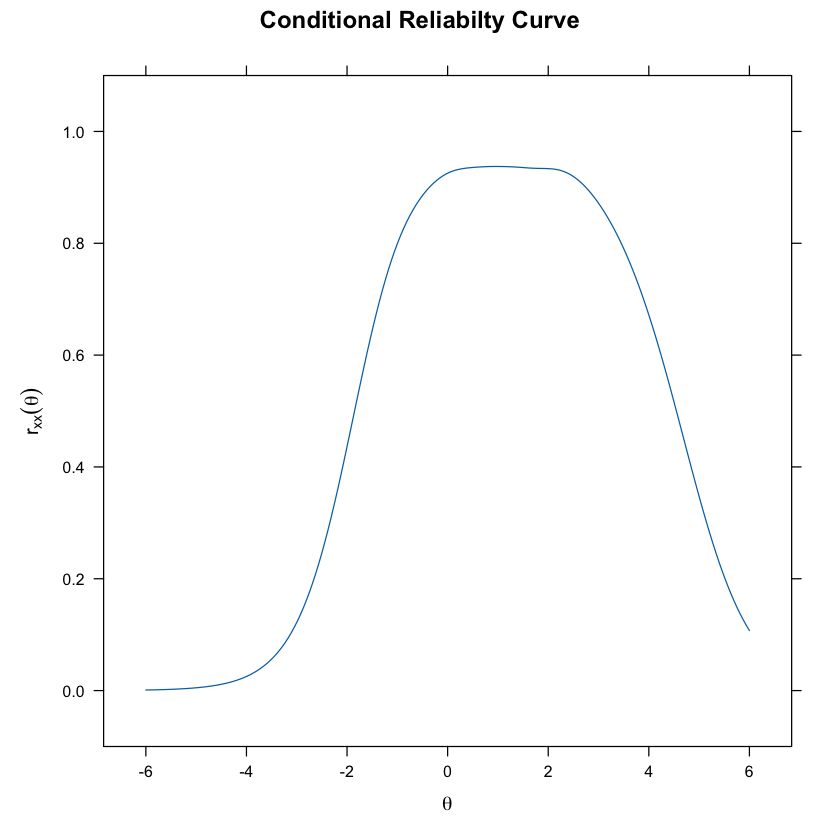

In [87]:
plot(mirt_grm,
    type = "rxx", theta_lim = c(-6, 6),
    main = "Conditional Reliabilty Curve"
)

Il concetto di affidabilità condizionale è illustrato sopra. Questa curva è matematicamente associata sia alle informazioni sulla scala che agli errori standard condizionati attraverso semplici trasformazioni. A causa di questa relazione, le stime dei punteggi sono più affidabili nell'intervallo di theta da -2 a +6.

È anche possibile calcolare una singola stima di affidabilità IRT. L'affidabilità marginale per la scala nel suo complesso è di 0.87.

In [130]:
marginal_rxx(mirt_grm)

[1] 0.8673361

## Curva caratteristica della scala

Come prossimo passo, possiamo usare i parametri del modello per generare stime dei punteggi theta dei rispondenti. Questi punteggi sono chiamati parametri della persona nell'IRT (vengono chiamati punteggi del fattore nella CFA). La funzione `mirt` usa una procedura di punteggio del tratto latente chiamata stima a posteriori attesa (EAP) per generare tali punteggi. Si tenga in considerazione che le stime sono nella metrica theta (normale standard) quindi possono essere interpretati come punteggi z. 

Una volta che le stime dei punteggi theta basate sul modello sono calcolate, spesso è di interesse trasformare tali stime nella metrica della scala originale. Una funzione caratteristica della scala fornisce un mezzo per trasformare i punteggi theta stimati in punteggi veri attesi nella metrica della scala originale. Questa trasformazione nella metrica della scala originale fornisce un quadro di riferimento più familiare per interpretare i punteggi. 

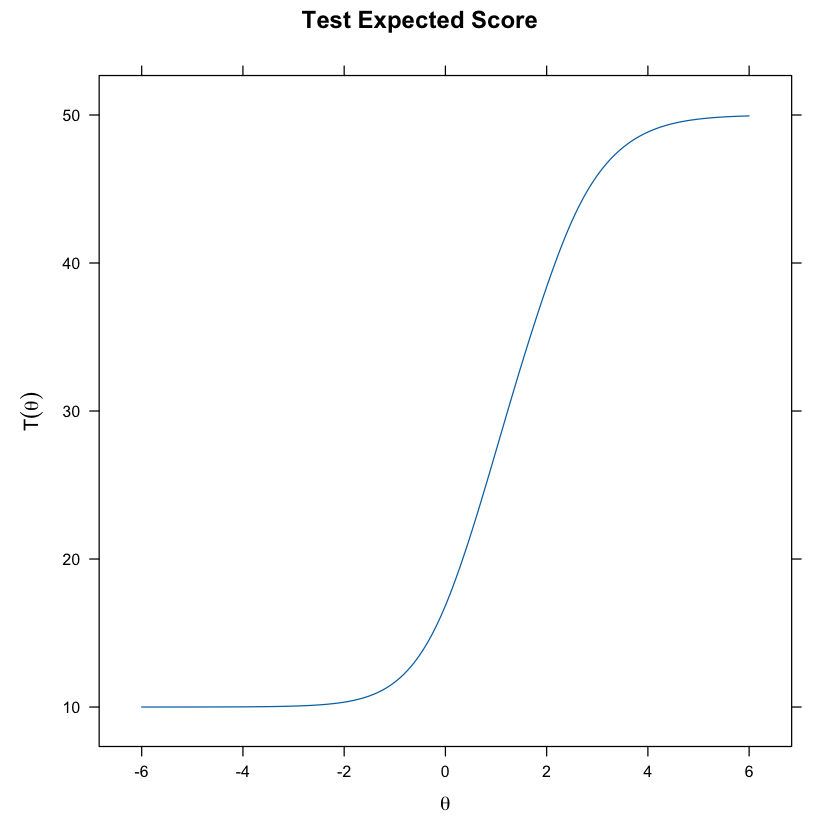

In [88]:
plot(mirt_grm,
    type = "score", theta_lim = c(-6, 6),
    main = "Test Expected Score"
)

## Attendibilità

In [89]:
marginal_rxx(mirt_grm) %>% round(3)

[1] 0.867

Il seguente codice calcola i punteggi grezzi osservati e stimati utilizzando il metodo EAPsum per un modello GRM. Confrontiamo i punteggi totali osservati e quelli predetti, insieme ai residui standardizzati.

In [90]:
fscores(mirt_grm, method = "EAPsum", full.scores = FALSE) %>% round(3)

      df       X2       p.X2    rxx_F1
stats 38 53.91985 0.04514934 0.8610634



,Sum.Scores,F1,SE_F1,observed,expected,std.res
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10,10,-1.515,0.580,218,186.285,2.324
11,11,-1.042,0.463,119,148.893,2.450
12,12,-0.787,0.427,119,134.579,1.343
13,13,-0.590,0.400,115,122.948,0.717
14,14,-0.418,0.372,121,111.579,0.892
15,15,-0.267,0.348,87,101.288,1.420
16,16,-0.133,0.330,96,92.416,0.373
17,17,-0.011,0.316,72,84.722,1.382
18,18,0.101,0.305,90,78.003,1.358


## Statistiche di Infit e Outfit

In [91]:
mirt::itemfit(mirt_grm, fit_stats = "infit", method = "ML")

item,outfit,z.outfit,infit,z.infit
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Distressed,1.0212414,0.4769906,1.0009891,0.03963688
Upset,0.7724958,-2.5666950,0.9023095,-2.34278922
Hostile,1.0357427,0.4962970,0.9889173,-0.23379715
Irritable,0.8752693,-2.4796215,0.9427137,-1.56167437
Scared,0.6369161,-2.1127647,0.8363244,-3.68553433
Afraid,0.6484001,-2.4269880,0.8130223,-4.40485340
Ashamed,0.8098411,-1.4938081,0.9348448,-1.30253073
Guilty,0.8538007,-1.4995277,0.9419180,-1.26399205
Nervous,0.7637294,-4.4562351,0.8775752,-3.33051668


Adattamento dei rispondenti.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


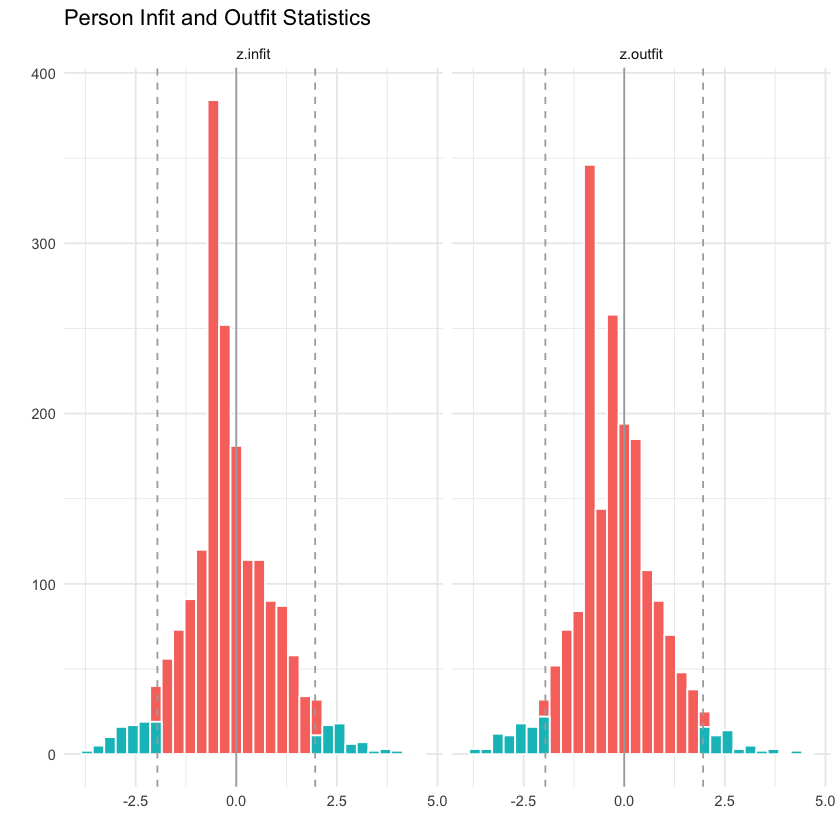

In [92]:
personfitPlot(mirt_grm)

## Abilità

Le stime delle abilità dei partecipanti si ottengono nel modo seguente:

In [131]:
# Calcola le stime delle abilità utilizzando il metodo EAPsum
abilita_partecipanti <- fscores(mirt_grm, method = "EAPsum")

# Visualizza le stime delle abilità
head(abilita_partecipanti)

F1
-0.7871069
-0.7871069
0.9044148
-1.5150601
-0.5899406
1.4670396


Verifichiamo creando un diagramma a dispersione con l'abilità $\theta$ stimata dal modello GRM in ascissa e il punteggio totale del test in ordinata.

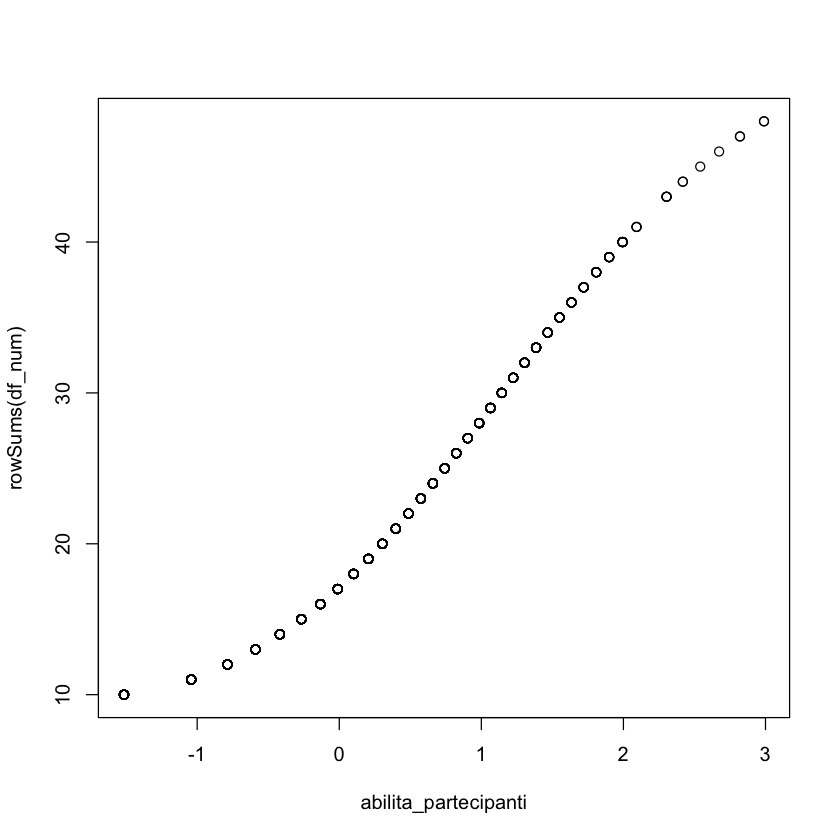

In [132]:
plot(abilita_partecipanti, rowSums(df_num))

Anche se le correlazione tra i due punteggi è molto alta

In [134]:
print(cor(abilita_partecipanti, rowSums(df_num)))

        [,1]
F1 0.9683747


il grafico mostra come questa relazione non sia lineare.

## Modello Sequenziale

Il Modello Sequenziale (Sequential Model), sviluppato da Tutz nel 1990 e ulteriormente elaborato nel 1997, è un approccio innovativo nella teoria della risposta all'item (IRT) per analizzare dati di test con risposte ordinate, in particolare quando le risposte possono essere considerate come il risultato di un processo decisionale sequenziale.

Il Modello Sequenziale si basa sull'idea che le risposte a un item siano il risultato di una serie di decisioni. Invece di scegliere direttamente tra diverse categorie di risposta, si presume che i rispondenti passino attraverso una sequenza di passaggi decisionali, con ogni passaggio che porta a una scelta tra due alternative.

Il modello considera la risposta a un item come una serie di decisioni binarie (sì/no). Ad esempio, in un test a scelta multipla, un rispondente potrebbe prima decidere se una risposta è corretta o errata, e poi, se errata, scegliere tra le opzioni rimanenti.

Ogni passaggio decisionale nella sequenza è modellato separatamente. Questo permette una comprensione più dettagliata di come i rispondenti arrivino alla loro scelta finale.

Il modello è particolarmente utile per item complessi dove la risposta finale è il risultato di una serie di considerazioni o giudizi.

Immaginiamo un questionario per la valutazione di un corso. I partecipanti potrebbero prima decidere se il corso è stato generale positivo o negativo (primo stadio decisionale). Se positivo, potrebbero poi decidere se è stato "buono" o "eccellente" (secondo stadio). Se negativo, la scelta potrebbe essere tra "insufficiente" e "mediocre".

In sintesi, il Modello Sequenziale di Tutz offre una prospettiva unica sull'analisi di risposte ordinate, enfatizzando il processo decisionale a più stadi che sta dietro la selezione di una risposta. 

## Modello a Crediti Parziali

Il modello a crediti parziali (PCM) è particolarmente utile per valutare risposte a domande che non seguono un ordine prestabilito e che richiedono una valutazione basata sui gradi di successo raggiunti. In questo modello, ciascun item permette di ottenere un punteggio variabile a seconda della completezza o della correttezza della risposta fornita. A differenza di altri modelli, nel PCM le soglie non sono stabilite tra categorie di risposta sequenziali, ma piuttosto tra i diversi livelli di punteggio che possono essere assegnati all'interno dello stesso item. Il modello quindi calcola una soglia specifica necessaria per avanzare da un livello di punteggio al successivo.

## Modello a Crediti Parziali Generalizzato

Il Modello a Crediti Parziali Generalizzato (Generalized Partial Credit Model, GPCM) è una versione estesa e più versatile del Modello a Crediti Parziali (Partial Credit Model, PCM). Ogni item in un test può avere un numero diverso di categorie di risposta. Questa caratteristica lo rende particolarmente adatto per test che includono item con formati di risposta variabili.

Il GPCM permette che ogni item abbia le proprie soglie specifiche. Questo significa che la transizione da una categoria di risposta all'altra può avere significati diversi per item differenti.

Una caratteristica distintiva del GPCM è che permette a ciascun item di avere il proprio parametro di discriminazione. Questo parametro misura quanto efficacemente un item distingue tra rispondenti con livelli diversi di abilità. 

Il GPCM è particolarmente utile in contesti di test dove gli item variano significativamente in termini di formato, difficoltà e capacità di discriminazione. Ad esempio, alcune domande potrebbero essere più efficaci nell'identificare studenti con abilità elevate, mentre altre potrebbero essere migliori nel differenziare tra studenti con abilità più basse. 

In sintesi, il Generalized Partial Credit Model fornisce una struttura flessibile e adattabile che può essere calibrata per adattarsi alle specifiche caratteristiche di ciascun item in un test. 

## Confronto tra modelli

Consideriamo il modello a crediti parziali vincolando i coefficienti angolari a 1 e stimando liberamente i parametri di varianza.

In [129]:
mirt_pcm <- mirt(df_num, 1, itemtype = "Rasch", verbose = FALSE)

Esaminiamo il modello a crediti parziali generalizzato.

In [121]:
mirt_gpcm <- mirt(df_num, 1, itemtype = "gpcm", verbose = FALSE)

Confronto PCM vs GPCM.

In [125]:
res_01 <- anova(mirt_pcm, mirt_gpcm) %>% as.data.frame() %>% round(3)
res_01

,AIC,SABIC,HQ,BIC,logLik,X2,df,p
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mirt_pcm,39783.17,39879.38,39866.65,40009.63,-19850.59,NA,NA,NA
mirt_gpcm,39497.72,39615.04,39599.52,39773.89,-19698.86,303.454,9,0


Confronto GPCM vs GRM.

In [126]:
res_02 <- anova(mirt_gpcm, mirt_grm) %>%
    as.data.frame() %>%
    round(3)
res_02

,AIC,SABIC,HQ,BIC,logLik,X2,df,p
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mirt_gpcm,39497.72,39615.04,39599.52,39773.89,-19698.86,NA,NA,NA
mirt_grm,39166.40,39283.73,39268.20,39442.57,-19533.20,331.317,0,NaN


## Dimensione del Campione

Nel contesto della teoria della risposta all'item (IRT) per dati politomici, la questione della grandezza del campione è fondamentale per garantire l'accuratezza e l'affidabilità delle stime dei parametri del modello. De Ayala (2009) ha fornito una panoramica delle ricerche riguardanti i requisiti di dimensione del campione per i modelli IRT, sia dicotomici che politomici, e ha offerto alcune linee guida utili.

1. **Numero di Categorie di Risposta:** Nei modelli politomici, il numero di categorie di risposta per item influisce significativamente sulla precisione della stima. Maggiore è il numero di categorie, maggiore sarà il numero complessivo di parametri dell'item da stimare.

2. **Distribuzione dei Parametri di Item e Persone:** Come nei modelli dicotomici, la forma e l'allineamento delle distribuzioni dei parametri di item e persone sono importanti. Una distribuzione ben bilanciata può contribuire a una stima più accurata.

De Ayala propone alcune regole empiriche per le dimensioni minime del campione nei modelli politomici:

- **Modello a Crediti Parziali e Modello a Scala di Valutazione:** Per questi modelli, è suggerita una dimensione minima del campione di circa 250 rispondenti. Questo è particolarmente pertinente per test che comprendono, ad esempio, 25 item con 5 categorie di risposta ciascuno.

- **Modello di Risposta Graduata:** Per il GRM, è raccomandata una dimensione del campione di circa 500 rispondenti, soprattutto quando si lavora con un numero elevato di item e categorie di risposta.

Problemi nella convergenza dell'algoritmo di stima e la presenza di errori standard elevati possono essere segnali che la dimensione del campione utilizzato non è sufficiente per una stima affidabile dei parametri del modello.

In sintesi, la scelta della grandezza del campione nei modelli IRT politomici deve considerare diversi fattori, inclusi il numero di item, il numero di categorie di risposta per item e il rapporto tra il numero di rispondenti e il numero di parametri dell'item da stimare. Seguendo le linee guida suggerite, i ricercatori possono assicurarsi di avere un campione di dimensioni adeguate per ottenere stime affidabili dei parametri del modello.

## Session Info

In [2]:
sessionInfo()

R version 4.3.2 (2023-10-31)
Platform: aarch64-apple-darwin20 (64-bit)
Running under: macOS Sonoma 14.3.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.11.0

locale:
[1] C

time zone: Europe/Rome
tzcode source: internal

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] kableExtra_1.4.0  latex2exp_0.9.6   WrightMap_1.3     psychotools_0.7-3
 [5] ggmirt_0.1.0      TAM_4.2-21        CDM_8.2-6         mvtnorm_1.2-4    
 [9] mirt_1.41         lattice_0.22-5    eRm_1.0-4         lubridate_1.9.3  
[13] forcats_1.0.0     stringr_1.5.1     dplyr_1.1.4       purrr_1.0.2      
[17] readr_2.1.5       tidyr_1.3.1       tibble_3.2.1      ggplot2_3.4.4    
[21] tidyverse_2.0.0  

loaded via a namespace (and not attached):